In [1]:
"""
Created on Sun Feb 12 2022

@author: Kevin Taylor
"""
# computation packages
import numpy as np
import pandas as pd
from math import *
from scipy import signal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import openpyxl
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from prophet import Prophet


# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from modeling_utils import * # local processing function

In [2]:
weekly_usage = pd.read_csv(
    '../Raw Data/weekly_usage.csv',
    index_col = 0
    ) # read the pre-processed file
weekly_overall = create_kwh_dataframe(weekly_usage) # apply processing function to convert to ts DataFrame
weekly_overall['week'] = weekly_overall.index 
weekly_overall = weekly_overall.groupby('week').mean() # group for all accounts combined, mean usage in kWh

<Figure size 1000x700 with 0 Axes>

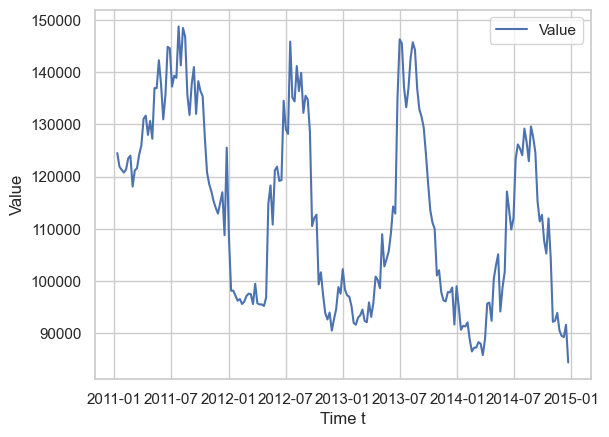

<Figure size 1000x700 with 0 Axes>

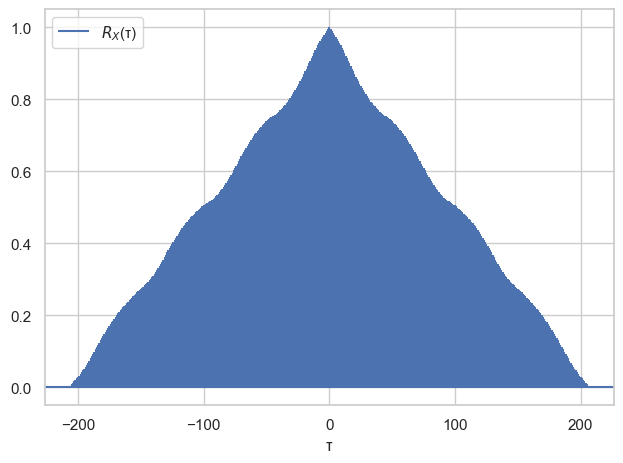

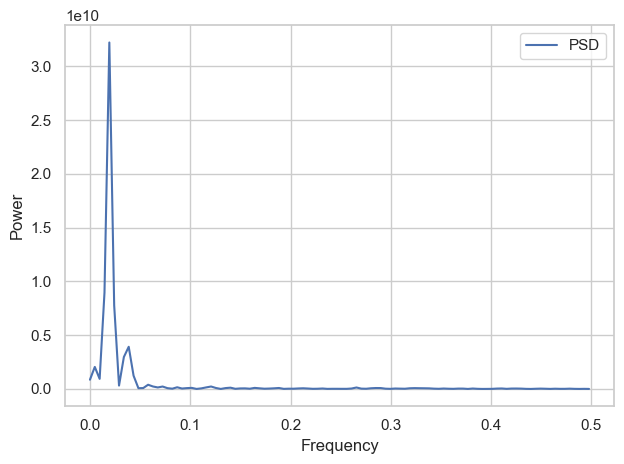

Max Power at period 51.75


In [3]:
ts_plots(weekly_overall, auto_lags = None) # Plot the timeseries, autocorrelation and PSD

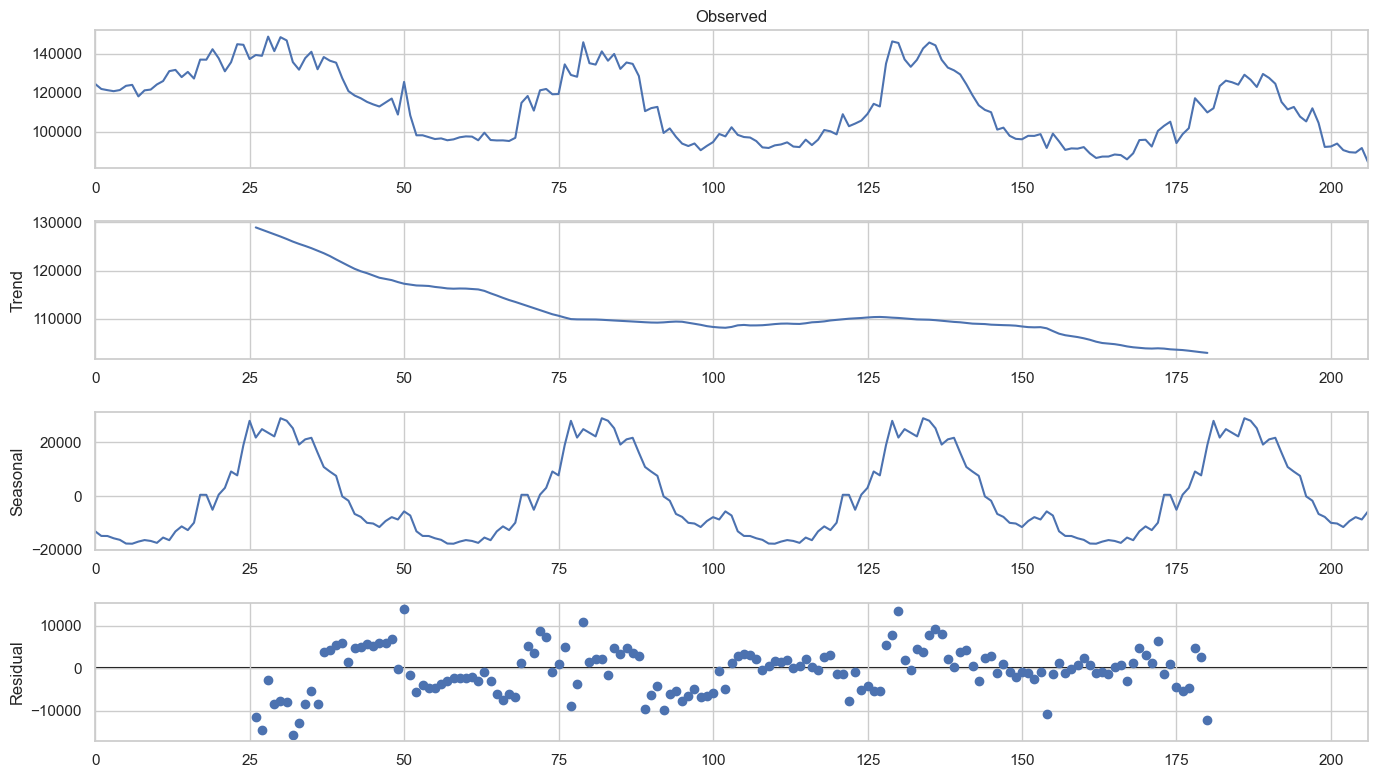

In [4]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=14)
result = seasonal_decompose(weekly_overall.value.values, period = 52, model='additive') # seasonal decomposition of overall ts
fig = result.plot()
# Appears to have 1st order trend with seasonal component, period of 52

In [5]:
train, test, fit, prediction = walk_forward_validation_sarimax(weekly_overall, round(len(weekly_overall)*0.2), 0, 1, 1, 0, 1, 1, 52)

MAPE = 4.49%


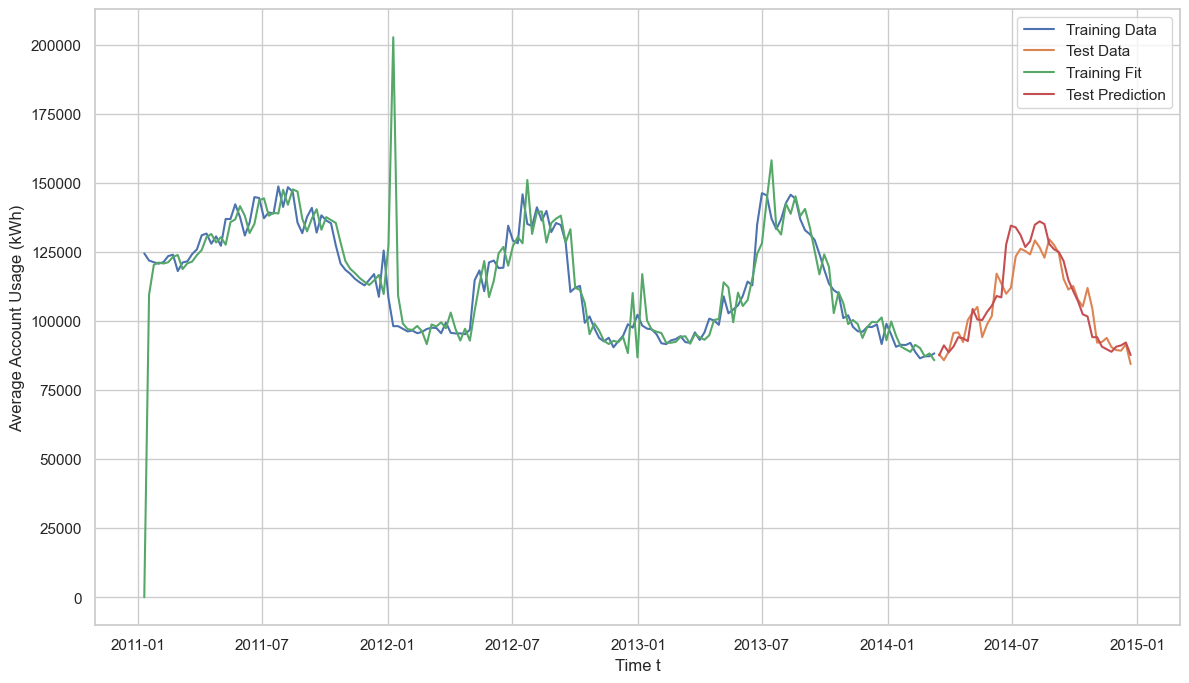

In [6]:
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Test Data')
plt.plot(fit, label = 'Training Fit')
plt.plot(prediction, label = 'Test Prediction')
plt.xlabel('Time t')
plt.ylabel('Average Account Usage (kWh)')
plt.legend()
print("MAPE = {:0.2%}".format(MAPE(test.value.values, prediction.values)))

Text(0, 0.5, 'Number of Accounts')

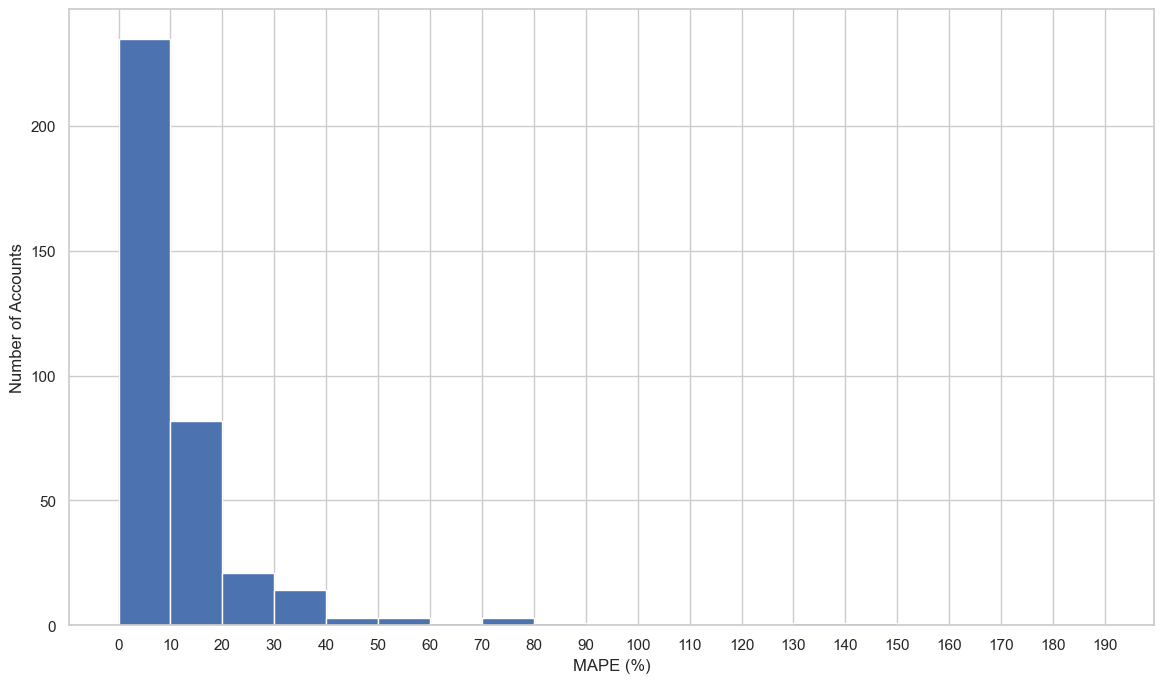

In [88]:
plt.hist(np.array(account_mape)*100, bins = np.arange(0, 200, 10))
plt.xticks(np.arange(0, 200, 10))
plt.xlabel('MAPE (%)')
plt.ylabel('Number of Accounts')

MAPE = 4.49%


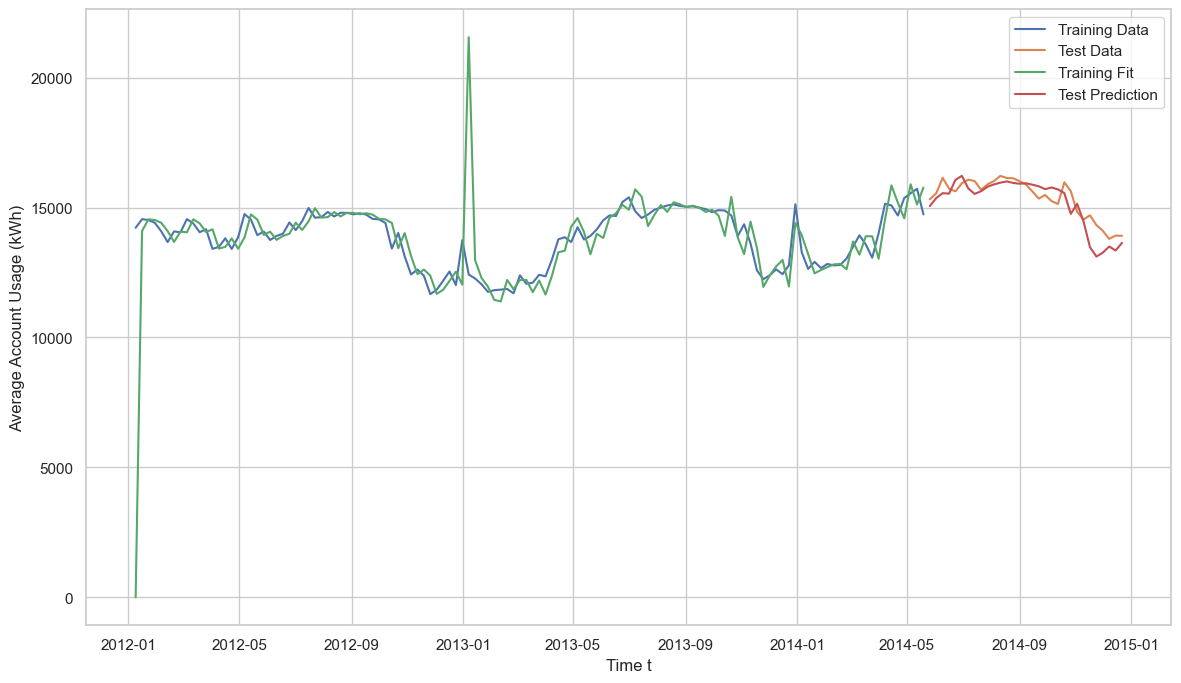

In [99]:
index = account_mape.index(min(account_mape))
plt.plot(account_train[index], label = 'Training Data')
plt.plot(account_test[index], label = 'Test Data')
plt.plot(account_fit[index], label = 'Training Fit')
plt.plot(account_prediction[index], label = 'Test Prediction')
plt.xlabel('Time t')
plt.ylabel('Average Account Usage (kWh)')
plt.legend()
print("MAPE = {:0.2%}".format(MAPE(test.value.values, prediction.values)))

In [48]:
account_numbers = []
account_train = []
account_test = []
account_fit = []
account_prediction = []
account_mape = []
account_errors = []
for account_number in tqdm(weekly_usage.account.unique()):
    try:
        df_account = create_kwh_dataframe(weekly_usage[weekly_usage.account == account_number]).drop(columns = ['account'])
        train, test, fit, prediction = walk_forward_validation_sarimax(df_account, round(len(df_account)*0.2), 0, 1, 1, 0, 1, 1, 52)
        account_numbers.append(account_number)
        account_train.append(train)
        account_test.append(test)
        account_fit.append(fit)
        account_prediction.append(prediction)
        account_mape.append(MAPE(test.value.values, prediction.values))
    except:
        account_errors.append(account_number)
        continue

  0%|          | 0/370 [00:00<?, ?it/s]

Optimization terminated successfully.
         Current function value: 4.513570
         Iterations: 3
         Function evaluations: 111


  0%|          | 1/370 [00:04<29:35,  4.81s/it]

Optimization terminated successfully.
         Current function value: 4.222082
         Iterations: 4
         Function evaluations: 158


  1%|          | 2/370 [00:11<36:52,  6.01s/it]

Optimization terminated successfully.
         Current function value: 4.733805
         Iterations: 2
         Function evaluations: 78


  1%|          | 3/370 [00:15<30:12,  4.94s/it]

Optimization terminated successfully.
         Current function value: 4.883133
         Iterations: 2
         Function evaluations: 71


  1%|          | 4/370 [00:18<26:43,  4.38s/it]

Optimization terminated successfully.
         Current function value: 4.844459
         Iterations: 2
         Function evaluations: 82


  1%|▏         | 5/370 [00:23<26:17,  4.32s/it]

Optimization terminated successfully.
         Current function value: 5.228687
         Iterations: 2
         Function evaluations: 71


  2%|▏         | 6/370 [00:26<25:18,  4.17s/it]

Optimization terminated successfully.
         Current function value: 4.600547
         Iterations: 4
         Function evaluations: 148


  2%|▏         | 7/370 [00:33<30:36,  5.06s/it]

Optimization terminated successfully.
         Current function value: 5.266858
         Iterations: 2
         Function evaluations: 69


  2%|▏         | 8/370 [00:37<27:33,  4.57s/it]

Optimization terminated successfully.
         Current function value: 4.791465
         Iterations: 3
         Function evaluations: 112


  2%|▏         | 9/370 [00:42<29:03,  4.83s/it]

Optimization terminated successfully.
         Current function value: 4.989282
         Iterations: 2
         Function evaluations: 80


  3%|▎         | 10/370 [00:46<27:27,  4.58s/it]

Optimization terminated successfully.
         Current function value: 4.398509
         Iterations: 2
         Function evaluations: 83


  3%|▎         | 11/370 [00:50<26:34,  4.44s/it]

Optimization terminated successfully.
         Current function value: 0.500571
         Iterations: 5
         Function evaluations: 286


  3%|▎         | 12/370 [00:57<29:50,  5.00s/it]

Optimization terminated successfully.
         Current function value: 4.788816
         Iterations: 3
         Function evaluations: 115


  4%|▎         | 13/370 [01:03<31:14,  5.25s/it]

Optimization terminated successfully.
         Current function value: 4.594905
         Iterations: 5
         Function evaluations: 203


  4%|▍         | 14/370 [01:12<39:14,  6.61s/it]

Optimization terminated successfully.
         Current function value: 4.536768
         Iterations: 3
         Function evaluations: 178


  4%|▍         | 16/370 [01:21<32:25,  5.50s/it]

Optimization terminated successfully.
         Current function value: 4.285531
         Iterations: 2
         Function evaluations: 79


  5%|▍         | 17/370 [01:25<30:21,  5.16s/it]

Optimization terminated successfully.
         Current function value: 5.554660
         Iterations: 2
         Function evaluations: 77


  5%|▍         | 18/370 [01:29<28:40,  4.89s/it]

Optimization terminated successfully.
         Current function value: 3.478815
         Iterations: 4
         Function evaluations: 149


  5%|▌         | 19/370 [01:36<32:22,  5.53s/it]

Optimization terminated successfully.
         Current function value: 4.480698
         Iterations: 2
         Function evaluations: 77


  5%|▌         | 20/370 [01:40<29:33,  5.07s/it]

Optimization terminated successfully.
         Current function value: 5.283468
         Iterations: 2
         Function evaluations: 73


  6%|▌         | 21/370 [01:44<27:27,  4.72s/it]

Optimization terminated successfully.
         Current function value: 4.174327
         Iterations: 3
         Function evaluations: 117


  6%|▌         | 22/370 [01:50<29:03,  5.01s/it]

Optimization terminated successfully.
         Current function value: 3.562006
         Iterations: 2
         Function evaluations: 69


  6%|▌         | 23/370 [01:53<26:36,  4.60s/it]

Optimization terminated successfully.
         Current function value: 4.233401
         Iterations: 2
         Function evaluations: 80


  6%|▋         | 24/370 [01:57<25:27,  4.41s/it]

Optimization terminated successfully.
         Current function value: 5.505987
         Iterations: 3
         Function evaluations: 116


  7%|▋         | 25/370 [02:03<27:55,  4.86s/it]

Optimization terminated successfully.
         Current function value: 3.882343
         Iterations: 4
         Function evaluations: 153


  7%|▋         | 26/370 [02:11<32:13,  5.62s/it]

Optimization terminated successfully.
         Current function value: 4.113044
         Iterations: 3
         Function evaluations: 118


  7%|▋         | 27/370 [02:16<32:37,  5.71s/it]

Optimization terminated successfully.
         Current function value: 4.724395
         Iterations: 2
         Function evaluations: 74


  8%|▊         | 28/370 [02:20<29:22,  5.15s/it]

Optimization terminated successfully.
         Current function value: 5.080199
         Iterations: 2
         Function evaluations: 75


  8%|▊         | 29/370 [02:24<27:14,  4.79s/it]

Optimization terminated successfully.
         Current function value: 1.875261
         Iterations: 3
         Function evaluations: 200


  8%|▊         | 30/370 [02:30<28:25,  5.02s/it]

Optimization terminated successfully.
         Current function value: 4.821808
         Iterations: 2
         Function evaluations: 71


  8%|▊         | 31/370 [02:34<26:16,  4.65s/it]

Optimization terminated successfully.
         Current function value: 3.232686
         Iterations: 2
         Function evaluations: 129


  9%|▊         | 32/370 [02:38<26:17,  4.67s/it]

Optimization terminated successfully.
         Current function value: 3.972568
         Iterations: 3
         Function evaluations: 203


  9%|▉         | 33/370 [02:46<32:07,  5.72s/it]

Optimization terminated successfully.
         Current function value: 3.918429
         Iterations: 3
         Function evaluations: 113


  9%|▉         | 34/370 [02:52<31:59,  5.71s/it]

Optimization terminated successfully.
         Current function value: 5.134569
         Iterations: 2
         Function evaluations: 74


  9%|▉         | 35/370 [02:56<29:00,  5.19s/it]

Optimization terminated successfully.
         Current function value: 4.836827
         Iterations: 5
         Function evaluations: 190


 10%|▉         | 36/370 [03:05<35:27,  6.37s/it]

Optimization terminated successfully.
         Current function value: 5.366442
         Iterations: 3
         Function evaluations: 111


 10%|█         | 37/370 [03:11<33:59,  6.13s/it]

Optimization terminated successfully.
         Current function value: 4.872815
         Iterations: 2
         Function evaluations: 70


 10%|█         | 38/370 [03:15<29:53,  5.40s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 11%|█         | 39/370 [03:16<22:28,  4.07s/it]

Optimization terminated successfully.
         Current function value: 5.259391
         Iterations: 5
         Function evaluations: 192


 11%|█         | 40/370 [03:25<30:49,  5.60s/it]

Optimization terminated successfully.
         Current function value: 4.466627
         Iterations: 2
         Function evaluations: 82


 11%|█▏        | 42/370 [03:29<21:46,  3.98s/it]

Optimization terminated successfully.
         Current function value: 6.051572
         Iterations: 2
         Function evaluations: 73


 12%|█▏        | 43/370 [03:33<21:33,  3.96s/it]

Optimization terminated successfully.
         Current function value: 4.184542
         Iterations: 3
         Function evaluations: 119


 12%|█▏        | 44/370 [03:39<24:03,  4.43s/it]

Optimization terminated successfully.
         Current function value: 5.124330
         Iterations: 2
         Function evaluations: 79


 12%|█▏        | 45/370 [03:43<23:40,  4.37s/it]

Optimization terminated successfully.
         Current function value: 5.099762
         Iterations: 2
         Function evaluations: 70


 12%|█▏        | 46/370 [03:46<22:34,  4.18s/it]

Optimization terminated successfully.
         Current function value: 4.157679
         Iterations: 4
         Function evaluations: 147


 13%|█▎        | 47/370 [03:54<26:57,  5.01s/it]

Optimization terminated successfully.
         Current function value: 4.021593
         Iterations: 3
         Function evaluations: 113


 13%|█▎        | 48/370 [03:59<27:37,  5.15s/it]

Optimization terminated successfully.
         Current function value: 6.095102
         Iterations: 2
         Function evaluations: 69


 13%|█▎        | 49/370 [04:03<25:15,  4.72s/it]

Optimization terminated successfully.
         Current function value: 5.263580
         Iterations: 2
         Function evaluations: 72


 14%|█▎        | 50/370 [04:07<23:49,  4.47s/it]

Optimization terminated successfully.
         Current function value: 4.695689
         Iterations: 2
         Function evaluations: 80


 14%|█▍        | 51/370 [04:11<23:17,  4.38s/it]

Optimization terminated successfully.
         Current function value: 4.324884
         Iterations: 3
         Function evaluations: 113


 14%|█▍        | 52/370 [04:16<25:09,  4.75s/it]

Optimization terminated successfully.
         Current function value: 4.712338
         Iterations: 2
         Function evaluations: 79


 14%|█▍        | 53/370 [04:20<24:05,  4.56s/it]

Optimization terminated successfully.
         Current function value: 4.621694
         Iterations: 2
         Function evaluations: 78


 15%|█▍        | 54/370 [04:24<23:10,  4.40s/it]

Optimization terminated successfully.
         Current function value: 4.434438
         Iterations: 3
         Function evaluations: 113


 15%|█▍        | 55/370 [04:30<25:02,  4.77s/it]

Optimization terminated successfully.
         Current function value: 4.194175
         Iterations: 4
         Function evaluations: 167


 15%|█▌        | 56/370 [04:38<29:52,  5.71s/it]

Optimization terminated successfully.
         Current function value: 4.573131
         Iterations: 4
         Function evaluations: 221


 15%|█▌        | 57/370 [04:48<37:09,  7.12s/it]

Optimization terminated successfully.
         Current function value: 4.952069
         Iterations: 2
         Function evaluations: 71


 16%|█▌        | 58/370 [04:52<31:45,  6.11s/it]

Optimization terminated successfully.
         Current function value: 5.079543
         Iterations: 2
         Function evaluations: 73


 16%|█▌        | 59/370 [04:56<28:08,  5.43s/it]

Optimization terminated successfully.
         Current function value: 4.133604
         Iterations: 4
         Function evaluations: 152


 16%|█▌        | 60/370 [05:03<30:50,  5.97s/it]

Optimization terminated successfully.
         Current function value: 4.855914
         Iterations: 3
         Function evaluations: 114


 16%|█▋        | 61/370 [05:09<30:14,  5.87s/it]

Optimization terminated successfully.
         Current function value: 4.630176
         Iterations: 2
         Function evaluations: 82


 17%|█▋        | 62/370 [05:13<27:31,  5.36s/it]

Optimization terminated successfully.
         Current function value: 4.016142
         Iterations: 4
         Function evaluations: 151


 17%|█▋        | 63/370 [05:20<30:12,  5.90s/it]

Optimization terminated successfully.
         Current function value: 6.589553
         Iterations: 2
         Function evaluations: 80


 17%|█▋        | 64/370 [05:24<27:18,  5.35s/it]

Optimization terminated successfully.
         Current function value: 4.681669
         Iterations: 2
         Function evaluations: 84


 18%|█▊        | 65/370 [05:29<25:37,  5.04s/it]

Optimization terminated successfully.
         Current function value: 5.059653
         Iterations: 2
         Function evaluations: 65


 18%|█▊        | 66/370 [05:32<23:21,  4.61s/it]

Optimization terminated successfully.
         Current function value: 5.461444
         Iterations: 3
         Function evaluations: 117


 18%|█▊        | 67/370 [05:38<25:03,  4.96s/it]

Optimization terminated successfully.
         Current function value: 5.382097
         Iterations: 3
         Function evaluations: 108


 18%|█▊        | 68/370 [05:43<25:30,  5.07s/it]

Optimization terminated successfully.
         Current function value: 5.091253
         Iterations: 2
         Function evaluations: 68


 19%|█▊        | 69/370 [05:47<23:13,  4.63s/it]

Optimization terminated successfully.
         Current function value: 4.296719
         Iterations: 2
         Function evaluations: 87


 19%|█▉        | 70/370 [05:51<22:41,  4.54s/it]

Optimization terminated successfully.
         Current function value: 4.392260
         Iterations: 2
         Function evaluations: 81


 19%|█▉        | 71/370 [05:55<21:57,  4.41s/it]

Optimization terminated successfully.
         Current function value: 4.955336
         Iterations: 2
         Function evaluations: 72


 19%|█▉        | 72/370 [05:59<20:53,  4.21s/it]

Optimization terminated successfully.
         Current function value: 4.920712
         Iterations: 4
         Function evaluations: 156


 20%|█▉        | 73/370 [06:07<25:44,  5.20s/it]

Optimization terminated successfully.
         Current function value: 4.738503
         Iterations: 2
         Function evaluations: 75


 20%|██        | 74/370 [06:10<23:36,  4.79s/it]

Optimization terminated successfully.
         Current function value: 4.402383
         Iterations: 3
         Function evaluations: 113


 20%|██        | 75/370 [06:16<24:41,  5.02s/it]

Optimization terminated successfully.
         Current function value: 4.696766
         Iterations: 2
         Function evaluations: 83


 21%|██        | 76/370 [06:20<23:25,  4.78s/it]

Optimization terminated successfully.
         Current function value: 4.429216
         Iterations: 3
         Function evaluations: 112


 21%|██        | 77/370 [06:26<24:25,  5.00s/it]

Optimization terminated successfully.
         Current function value: 4.348820
         Iterations: 2
         Function evaluations: 82


 21%|██        | 78/370 [06:30<23:03,  4.74s/it]

Optimization terminated successfully.
         Current function value: 4.970511
         Iterations: 4
         Function evaluations: 150


 21%|██▏       | 79/370 [06:37<26:36,  5.49s/it]

Optimization terminated successfully.
         Current function value: 4.066008
         Iterations: 5
         Function evaluations: 201


 22%|██▏       | 80/370 [06:47<32:33,  6.73s/it]

Optimization terminated successfully.
         Current function value: 4.883323
         Iterations: 2
         Function evaluations: 71


 22%|██▏       | 81/370 [06:51<28:27,  5.91s/it]

Optimization terminated successfully.
         Current function value: 4.228052
         Iterations: 3
         Function evaluations: 112


 22%|██▏       | 82/370 [06:56<27:45,  5.78s/it]

Optimization terminated successfully.
         Current function value: 4.648044
         Iterations: 2
         Function evaluations: 74


 22%|██▏       | 83/370 [07:01<25:33,  5.34s/it]

Optimization terminated successfully.
         Current function value: 5.376980
         Iterations: 2
         Function evaluations: 70


 23%|██▎       | 84/370 [07:05<23:43,  4.98s/it]

Optimization terminated successfully.
         Current function value: 5.114569
         Iterations: 2
         Function evaluations: 73


 23%|██▎       | 85/370 [07:09<23:25,  4.93s/it]

Optimization terminated successfully.
         Current function value: 6.028694
         Iterations: 2
         Function evaluations: 79


 23%|██▎       | 86/370 [07:14<22:27,  4.74s/it]

Optimization terminated successfully.
         Current function value: 5.239430
         Iterations: 3
         Function evaluations: 116


 24%|██▎       | 87/370 [07:21<25:21,  5.38s/it]

Optimization terminated successfully.
         Current function value: 5.029182
         Iterations: 2
         Function evaluations: 71


 24%|██▍       | 88/370 [07:25<23:16,  4.95s/it]

Optimization terminated successfully.
         Current function value: 5.295250
         Iterations: 2
         Function evaluations: 71


 24%|██▍       | 89/370 [07:29<21:42,  4.63s/it]

Optimization terminated successfully.
         Current function value: 5.617816
         Iterations: 2
         Function evaluations: 75


 24%|██▍       | 90/370 [07:33<21:00,  4.50s/it]

Optimization terminated successfully.
         Current function value: 5.288894
         Iterations: 4
         Function evaluations: 148


 25%|██▍       | 91/370 [07:40<25:19,  5.45s/it]

Optimization terminated successfully.
         Current function value: 2.839359
         Iterations: 3
         Function evaluations: 122


 25%|██▍       | 92/370 [07:44<23:17,  5.03s/it]

Optimization terminated successfully.
         Current function value: 5.228898
         Iterations: 4
         Function evaluations: 148


 25%|██▌       | 93/370 [07:52<26:47,  5.80s/it]

Optimization terminated successfully.
         Current function value: 5.031296
         Iterations: 5
         Function evaluations: 197


 25%|██▌       | 94/370 [08:02<32:04,  6.97s/it]

Optimization terminated successfully.
         Current function value: 4.395533
         Iterations: 4
         Function evaluations: 165


 26%|██▌       | 95/370 [08:10<33:52,  7.39s/it]

Optimization terminated successfully.
         Current function value: 3.850272
         Iterations: 4
         Function evaluations: 150


 26%|██▌       | 96/370 [08:18<34:06,  7.47s/it]

Optimization terminated successfully.
         Current function value: 5.584862
         Iterations: 3
         Function evaluations: 113


 26%|██▌       | 97/370 [08:23<31:36,  6.95s/it]

Optimization terminated successfully.
         Current function value: 5.943769
         Iterations: 2
         Function evaluations: 78


 26%|██▋       | 98/370 [08:28<27:45,  6.12s/it]

Optimization terminated successfully.
         Current function value: 6.493868
         Iterations: 2
         Function evaluations: 79


 27%|██▋       | 99/370 [08:32<25:12,  5.58s/it]

Optimization terminated successfully.
         Current function value: 4.853212
         Iterations: 3
         Function evaluations: 116


 27%|██▋       | 100/370 [08:38<25:31,  5.67s/it]

Optimization terminated successfully.
         Current function value: 6.281965
         Iterations: 4
         Function evaluations: 161


 27%|██▋       | 101/370 [08:46<28:08,  6.28s/it]

Optimization terminated successfully.
         Current function value: 6.113220
         Iterations: 2
         Function evaluations: 71


 28%|██▊       | 102/370 [08:49<24:40,  5.52s/it]

Optimization terminated successfully.
         Current function value: 6.250556
         Iterations: 2
         Function evaluations: 70


 28%|██▊       | 103/370 [08:53<22:09,  4.98s/it]

Optimization terminated successfully.
         Current function value: 6.009760
         Iterations: 3
         Function evaluations: 112


 28%|██▊       | 104/370 [08:59<22:50,  5.15s/it]

Optimization terminated successfully.
         Current function value: 5.541202
         Iterations: 3
         Function evaluations: 112


 28%|██▊       | 105/370 [09:04<23:18,  5.28s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 29%|██▊       | 106/370 [09:05<17:16,  3.93s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 29%|██▉       | 108/370 [09:06<10:05,  2.31s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 29%|██▉       | 109/370 [09:07<07:57,  1.83s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 30%|██▉       | 110/370 [09:08<06:33,  1.51s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 30%|███       | 112/370 [09:09<04:53,  1.14s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 31%|███       | 113/370 [09:10<04:23,  1.03s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 5.580883
         Iterations: 4
         Function evaluations: 149


 31%|███       | 115/370 [09:19<10:07,  2.38s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 31%|███▏      | 116/370 [09:20<07:54,  1.87s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 32%|███▏      | 117/370 [09:20<06:27,  1.53s/it]

Optimization terminated successfully.
         Current function value: 5.052287
         Iterations: 2
         Function evaluations: 80


 32%|███▏      | 118/370 [09:24<09:43,  2.32s/it]

Optimization terminated successfully.
         Current function value: 4.895401
         Iterations: 2
         Function evaluations: 72


 32%|███▏      | 119/370 [09:28<11:31,  2.75s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 32%|███▏      | 120/370 [09:29<09:01,  2.17s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 33%|███▎      | 121/370 [09:30<07:19,  1.76s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 33%|███▎      | 122/370 [09:31<06:05,  1.47s/it]

Optimization terminated successfully.
         Current function value: 4.880265
         Iterations: 2
         Function evaluations: 77


 33%|███▎      | 123/370 [09:35<09:30,  2.31s/it]

Optimization terminated successfully.
         Current function value: 6.465768
         Iterations: 2
         Function evaluations: 74


 34%|███▎      | 124/370 [09:40<13:18,  3.25s/it]

Optimization terminated successfully.
         Current function value: 4.188625
         Iterations: 4
         Function evaluations: 146


 34%|███▍      | 125/370 [09:48<18:25,  4.51s/it]

Optimization terminated successfully.
         Current function value: 4.434230
         Iterations: 2
         Function evaluations: 80


 34%|███▍      | 126/370 [09:52<18:07,  4.46s/it]

Optimization terminated successfully.
         Current function value: 4.569499
         Iterations: 3
         Function evaluations: 114


 34%|███▍      | 127/370 [09:57<18:45,  4.63s/it]

Optimization terminated successfully.
         Current function value: 5.703934
         Iterations: 3
         Function evaluations: 116


 35%|███▍      | 128/370 [10:03<20:21,  5.05s/it]

Optimization terminated successfully.
         Current function value: 5.216773
         Iterations: 2
         Function evaluations: 81


 35%|███▍      | 129/370 [10:08<19:29,  4.85s/it]

Optimization terminated successfully.
         Current function value: 4.992721
         Iterations: 2
         Function evaluations: 82


 35%|███▌      | 130/370 [10:12<18:56,  4.74s/it]

Optimization terminated successfully.
         Current function value: 6.507679
         Iterations: 4
         Function evaluations: 157


 35%|███▌      | 131/370 [10:23<25:47,  6.48s/it]

Optimization terminated successfully.
         Current function value: 5.314776
         Iterations: 3
         Function evaluations: 113


 36%|███▌      | 133/370 [10:31<19:58,  5.06s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 2.389680
         Iterations: 3
         Function evaluations: 111


 36%|███▌      | 134/370 [10:35<18:27,  4.69s/it]

Optimization terminated successfully.
         Current function value: 4.170091
         Iterations: 2
         Function evaluations: 76


 36%|███▋      | 135/370 [10:39<17:37,  4.50s/it]

Optimization terminated successfully.
         Current function value: 4.890391
         Iterations: 2
         Function evaluations: 71


 37%|███▋      | 136/370 [10:43<16:58,  4.35s/it]

Optimization terminated successfully.
         Current function value: 4.688786
         Iterations: 2
         Function evaluations: 83


 37%|███▋      | 137/370 [10:48<17:01,  4.38s/it]

Optimization terminated successfully.
         Current function value: 5.190780
         Iterations: 3
         Function evaluations: 116


 37%|███▋      | 138/370 [10:54<19:01,  4.92s/it]

Optimization terminated successfully.
         Current function value: 5.816090
         Iterations: 2
         Function evaluations: 69


 38%|███▊      | 139/370 [10:58<17:39,  4.59s/it]

Optimization terminated successfully.
         Current function value: 5.831157
         Iterations: 5
         Function evaluations: 187


 38%|███▊      | 140/370 [11:07<23:02,  6.01s/it]

Optimization terminated successfully.
         Current function value: 3.891544
         Iterations: 4
         Function evaluations: 163


 38%|███▊      | 141/370 [11:15<25:31,  6.69s/it]

Optimization terminated successfully.
         Current function value: 5.289674
         Iterations: 4
         Function evaluations: 148


 38%|███▊      | 142/370 [11:23<26:26,  6.96s/it]

Optimization terminated successfully.
         Current function value: 5.475946
         Iterations: 3
         Function evaluations: 118


 39%|███▊      | 143/370 [11:29<25:19,  6.69s/it]

Optimization terminated successfully.
         Current function value: 3.872091
         Iterations: 2
         Function evaluations: 146


 39%|███▉      | 144/370 [11:34<23:47,  6.32s/it]

Optimization terminated successfully.
         Current function value: 4.288714
         Iterations: 2
         Function evaluations: 69


 39%|███▉      | 145/370 [11:38<20:46,  5.54s/it]

Optimization terminated successfully.
         Current function value: 4.390040
         Iterations: 2
         Function evaluations: 66


 39%|███▉      | 146/370 [11:42<18:37,  4.99s/it]

Optimization terminated successfully.
         Current function value: 6.400708
         Iterations: 2
         Function evaluations: 82


 40%|███▉      | 147/370 [11:46<18:19,  4.93s/it]

Optimization terminated successfully.
         Current function value: 5.312965
         Iterations: 2
         Function evaluations: 80


 40%|████      | 148/370 [11:51<17:23,  4.70s/it]

Optimization terminated successfully.
         Current function value: 3.639291
         Iterations: 4
         Function evaluations: 143


 40%|████      | 149/370 [11:58<19:42,  5.35s/it]

Optimization terminated successfully.
         Current function value: 4.116468
         Iterations: 2
         Function evaluations: 79


 41%|████      | 150/370 [12:01<18:05,  4.93s/it]

Optimization terminated successfully.
         Current function value: 4.949333
         Iterations: 2
         Function evaluations: 76


 41%|████      | 151/370 [12:06<17:04,  4.68s/it]

Optimization terminated successfully.
         Current function value: 3.500975
         Iterations: 4
         Function evaluations: 150


 41%|████      | 152/370 [12:11<17:37,  4.85s/it]

Optimization terminated successfully.
         Current function value: 5.144063
         Iterations: 2
         Function evaluations: 69


 41%|████▏     | 153/370 [12:15<16:44,  4.63s/it]

Optimization terminated successfully.
         Current function value: 4.431288
         Iterations: 3
         Function evaluations: 113


 42%|████▏     | 154/370 [12:21<18:03,  5.01s/it]

Optimization terminated successfully.
         Current function value: 5.323300
         Iterations: 2
         Function evaluations: 70


 42%|████▏     | 155/370 [12:25<16:40,  4.65s/it]

Optimization terminated successfully.
         Current function value: 5.984888
         Iterations: 5
         Function evaluations: 186


 42%|████▏     | 156/370 [12:37<24:46,  6.94s/it]

Optimization terminated successfully.
         Current function value: 6.511468
         Iterations: 2
         Function evaluations: 74


 42%|████▏     | 157/370 [12:41<21:29,  6.05s/it]

Optimization terminated successfully.
         Current function value: 5.861885
         Iterations: 2
         Function evaluations: 78


 43%|████▎     | 158/370 [12:47<21:04,  5.96s/it]

Optimization terminated successfully.
         Current function value: 5.908071
         Iterations: 2
         Function evaluations: 70


 43%|████▎     | 160/370 [12:52<14:40,  4.19s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 7.959057
         Iterations: 2
         Function evaluations: 70


 44%|████▎     | 161/370 [12:57<15:31,  4.46s/it]

Optimization terminated successfully.
         Current function value: 6.319836
         Iterations: 2
         Function evaluations: 76


 44%|████▍     | 162/370 [13:03<16:25,  4.74s/it]

Optimization terminated successfully.
         Current function value: 7.816882
         Iterations: 2
         Function evaluations: 69


 44%|████▍     | 163/370 [13:08<16:45,  4.86s/it]

Optimization terminated successfully.
         Current function value: 5.767686
         Iterations: 2
         Function evaluations: 78


 44%|████▍     | 164/370 [13:14<17:19,  5.05s/it]

Optimization terminated successfully.
         Current function value: 0.358636
         Iterations: 4
         Function evaluations: 212


 45%|████▍     | 165/370 [13:18<16:58,  4.97s/it]

Optimization terminated successfully.
         Current function value: 7.580149
         Iterations: 3
         Function evaluations: 110


 45%|████▍     | 166/370 [13:26<19:32,  5.75s/it]

Optimization terminated successfully.
         Current function value: 4.370148
         Iterations: 3
         Function evaluations: 178


 45%|████▌     | 167/370 [13:33<21:20,  6.31s/it]

Optimization terminated successfully.
         Current function value: 5.727999
         Iterations: 2
         Function evaluations: 71


 45%|████▌     | 168/370 [13:39<20:14,  6.01s/it]

Optimization terminated successfully.
         Current function value: 4.843150
         Iterations: 2
         Function evaluations: 84


 46%|████▌     | 169/370 [13:45<19:50,  5.92s/it]

Optimization terminated successfully.
         Current function value: 2.718825
         Iterations: 4
         Function evaluations: 154


 46%|████▌     | 170/370 [13:49<18:40,  5.60s/it]

Optimization terminated successfully.
         Current function value: 6.210080
         Iterations: 2
         Function evaluations: 71


 46%|████▌     | 171/370 [13:55<18:11,  5.48s/it]

Optimization terminated successfully.
         Current function value: 5.922671
         Iterations: 2
         Function evaluations: 72


 46%|████▋     | 172/370 [14:00<17:45,  5.38s/it]

Optimization terminated successfully.
         Current function value: 4.451743
         Iterations: 3
         Function evaluations: 203


 47%|████▋     | 173/370 [14:09<21:44,  6.62s/it]

Optimization terminated successfully.
         Current function value: 6.154135
         Iterations: 3
         Function evaluations: 113


 47%|████▋     | 174/370 [14:17<22:54,  7.01s/it]

Optimization terminated successfully.
         Current function value: 6.102768
         Iterations: 2
         Function evaluations: 71


 47%|████▋     | 175/370 [14:22<21:05,  6.49s/it]

Optimization terminated successfully.
         Current function value: 5.560108
         Iterations: 2
         Function evaluations: 83


 48%|████▊     | 176/370 [14:28<20:27,  6.33s/it]

Optimization terminated successfully.
         Current function value: 4.435559
         Iterations: 2
         Function evaluations: 76


 48%|████▊     | 178/370 [14:32<12:36,  3.94s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 48%|████▊     | 179/370 [14:33<09:34,  3.01s/it]

Optimization terminated successfully.
         Current function value: 6.121665
         Iterations: 2
         Function evaluations: 71


 49%|████▊     | 180/370 [14:38<11:33,  3.65s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 49%|████▉     | 181/370 [14:39<08:42,  2.77s/it]

Optimization terminated successfully.
         Current function value: 5.182947
         Iterations: 4
         Function evaluations: 163


 49%|████▉     | 182/370 [14:50<16:02,  5.12s/it]

Optimization terminated successfully.
         Current function value: 5.385213
         Iterations: 3
         Function evaluations: 114


 49%|████▉     | 183/370 [14:57<18:16,  5.86s/it]

Optimization terminated successfully.
         Current function value: 4.097513
         Iterations: 3
         Function evaluations: 118


 50%|████▉     | 184/370 [15:02<17:17,  5.58s/it]

Optimization terminated successfully.
         Current function value: 1.694761
         Iterations: 2
         Function evaluations: 234


 50%|█████     | 185/370 [15:08<17:37,  5.71s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 50%|█████     | 186/370 [15:09<13:10,  4.30s/it]

Optimization terminated successfully.
         Current function value: 5.825915
         Iterations: 4
         Function evaluations: 156


 51%|█████     | 187/370 [15:19<18:44,  6.14s/it]

Optimization terminated successfully.
         Current function value: 4.895400
         Iterations: 3
         Function evaluations: 110


 51%|█████     | 188/370 [15:27<19:42,  6.50s/it]

Optimization terminated successfully.
         Current function value: 6.735416
         Iterations: 2
         Function evaluations: 78


 51%|█████     | 189/370 [15:33<18:53,  6.26s/it]

Optimization terminated successfully.
         Current function value: 6.854561
         Iterations: 2
         Function evaluations: 71


 51%|█████▏    | 190/370 [15:38<17:55,  5.98s/it]

Optimization terminated successfully.
         Current function value: 7.581060
         Iterations: 2
         Function evaluations: 74


 52%|█████▏    | 191/370 [15:43<17:17,  5.79s/it]

Optimization terminated successfully.
         Current function value: 6.788376
         Iterations: 2
         Function evaluations: 72


 52%|█████▏    | 192/370 [15:48<16:32,  5.58s/it]

Optimization terminated successfully.
         Current function value: 6.547771
         Iterations: 2
         Function evaluations: 70


 52%|█████▏    | 193/370 [15:53<16:01,  5.43s/it]

Optimization terminated successfully.
         Current function value: 7.971127
         Iterations: 3
         Function evaluations: 113


 52%|█████▏    | 194/370 [16:01<17:57,  6.12s/it]

Optimization terminated successfully.
         Current function value: 6.597200
         Iterations: 2
         Function evaluations: 69


 53%|█████▎    | 195/370 [16:06<16:57,  5.82s/it]

Optimization terminated successfully.
         Current function value: 9.388258
         Iterations: 2
         Function evaluations: 71


 53%|█████▎    | 196/370 [16:11<16:23,  5.65s/it]

Optimization terminated successfully.
         Current function value: 5.868026
         Iterations: 2
         Function evaluations: 71


 53%|█████▎    | 197/370 [16:17<15:55,  5.52s/it]

Optimization terminated successfully.
         Current function value: 6.457767
         Iterations: 2
         Function evaluations: 71


 54%|█████▎    | 198/370 [16:22<15:34,  5.43s/it]

Optimization terminated successfully.
         Current function value: 6.811978
         Iterations: 2
         Function evaluations: 79


 54%|█████▍    | 199/370 [16:28<15:41,  5.50s/it]

Optimization terminated successfully.
         Current function value: 7.009282
         Iterations: 2
         Function evaluations: 71


 54%|█████▍    | 200/370 [16:33<15:20,  5.41s/it]

Optimization terminated successfully.
         Current function value: 6.482663
         Iterations: 2
         Function evaluations: 72


 54%|█████▍    | 201/370 [16:38<15:08,  5.38s/it]

Optimization terminated successfully.
         Current function value: 6.247677
         Iterations: 2
         Function evaluations: 70


 55%|█████▍    | 202/370 [16:43<14:57,  5.34s/it]

Optimization terminated successfully.
         Current function value: 6.805110
         Iterations: 2
         Function evaluations: 71


 55%|█████▍    | 203/370 [16:49<14:49,  5.33s/it]

Optimization terminated successfully.
         Current function value: 7.145802
         Iterations: 3
         Function evaluations: 107


 55%|█████▌    | 204/370 [16:56<16:31,  5.97s/it]

Optimization terminated successfully.
         Current function value: 6.611239
         Iterations: 2
         Function evaluations: 71


 55%|█████▌    | 205/370 [17:01<15:42,  5.71s/it]

Optimization terminated successfully.
         Current function value: 6.179689
         Iterations: 2
         Function evaluations: 77


 56%|█████▌    | 206/370 [17:07<15:30,  5.67s/it]

Optimization terminated successfully.
         Current function value: 7.248287
         Iterations: 2
         Function evaluations: 71


 56%|█████▌    | 207/370 [17:12<15:01,  5.53s/it]

Optimization terminated successfully.
         Current function value: 8.520056
         Iterations: 2
         Function evaluations: 71


 56%|█████▌    | 208/370 [17:17<14:37,  5.42s/it]

Optimization terminated successfully.
         Current function value: 6.865799
         Iterations: 2
         Function evaluations: 69


 56%|█████▋    | 209/370 [17:22<14:14,  5.30s/it]

Optimization terminated successfully.
         Current function value: 6.888844
         Iterations: 2
         Function evaluations: 72


 57%|█████▋    | 210/370 [17:27<14:05,  5.28s/it]

Optimization terminated successfully.
         Current function value: 6.185016
         Iterations: 2
         Function evaluations: 78


 57%|█████▋    | 211/370 [17:33<14:11,  5.36s/it]

Optimization terminated successfully.
         Current function value: 6.408969
         Iterations: 2
         Function evaluations: 71


 57%|█████▋    | 212/370 [17:38<13:55,  5.29s/it]

Optimization terminated successfully.
         Current function value: 7.283563
         Iterations: 2
         Function evaluations: 72


 58%|█████▊    | 213/370 [17:43<13:49,  5.28s/it]

Optimization terminated successfully.
         Current function value: 6.760983
         Iterations: 2
         Function evaluations: 72


 58%|█████▊    | 214/370 [17:49<13:45,  5.29s/it]

Optimization terminated successfully.
         Current function value: 6.449599
         Iterations: 2
         Function evaluations: 73


 58%|█████▊    | 215/370 [17:54<13:43,  5.31s/it]

Optimization terminated successfully.
         Current function value: 7.555931
         Iterations: 2
         Function evaluations: 71


 58%|█████▊    | 216/370 [17:59<13:31,  5.27s/it]

Optimization terminated successfully.
         Current function value: 6.212262
         Iterations: 2
         Function evaluations: 71


 59%|█████▊    | 217/370 [18:04<13:24,  5.26s/it]

Optimization terminated successfully.
         Current function value: 7.462122
         Iterations: 2
         Function evaluations: 71


 59%|█████▉    | 218/370 [18:09<13:11,  5.20s/it]

Optimization terminated successfully.
         Current function value: 6.889009
         Iterations: 2
         Function evaluations: 78


 59%|█████▉    | 219/370 [18:15<13:27,  5.35s/it]

Optimization terminated successfully.
         Current function value: 8.079367
         Iterations: 2
         Function evaluations: 70


 59%|█████▉    | 220/370 [18:20<13:13,  5.29s/it]

Optimization terminated successfully.
         Current function value: 5.973735
         Iterations: 2
         Function evaluations: 78


 60%|█████▉    | 221/370 [18:26<13:30,  5.44s/it]

Optimization terminated successfully.
         Current function value: 7.126358
         Iterations: 2
         Function evaluations: 71


 60%|██████    | 222/370 [18:32<13:24,  5.44s/it]

Optimization terminated successfully.
         Current function value: 2.460965
         Iterations: 4
         Function evaluations: 165


 60%|██████    | 223/370 [18:36<12:56,  5.28s/it]

Optimization terminated successfully.
         Current function value: 1.940170
         Iterations: 4
         Function evaluations: 166


 61%|██████    | 224/370 [18:41<12:10,  5.00s/it]

Optimization terminated successfully.
         Current function value: 6.366980
         Iterations: 2
         Function evaluations: 69


 61%|██████    | 225/370 [18:46<12:08,  5.02s/it]

Optimization terminated successfully.
         Current function value: 6.849269
         Iterations: 3
         Function evaluations: 105


 61%|██████    | 226/370 [18:53<13:39,  5.69s/it]

Optimization terminated successfully.
         Current function value: 6.351899
         Iterations: 2
         Function evaluations: 72


 61%|██████▏   | 227/370 [18:58<13:13,  5.55s/it]

Optimization terminated successfully.
         Current function value: 8.243925
         Iterations: 2
         Function evaluations: 72


 62%|██████▏   | 228/370 [19:03<12:49,  5.42s/it]

Optimization terminated successfully.
         Current function value: 7.069645
         Iterations: 2
         Function evaluations: 72


 62%|██████▏   | 229/370 [19:09<12:41,  5.40s/it]

Optimization terminated successfully.
         Current function value: 5.699680
         Iterations: 2
         Function evaluations: 81


 62%|██████▏   | 230/370 [19:15<12:55,  5.54s/it]

Optimization terminated successfully.
         Current function value: 6.928289
         Iterations: 2
         Function evaluations: 71


 62%|██████▏   | 231/370 [19:20<12:42,  5.48s/it]

Optimization terminated successfully.
         Current function value: 5.517045
         Iterations: 2
         Function evaluations: 80


 63%|██████▎   | 232/370 [19:26<12:49,  5.58s/it]

Optimization terminated successfully.
         Current function value: 5.863928
         Iterations: 2
         Function evaluations: 81


 63%|██████▎   | 233/370 [19:32<12:49,  5.62s/it]

Optimization terminated successfully.
         Current function value: 5.519423
         Iterations: 3
         Function evaluations: 115


 63%|██████▎   | 234/370 [19:40<14:19,  6.32s/it]

Optimization terminated successfully.
         Current function value: 7.252224
         Iterations: 2
         Function evaluations: 73


 64%|██████▎   | 235/370 [19:45<13:30,  6.01s/it]

Optimization terminated successfully.
         Current function value: 5.999492
         Iterations: 2
         Function evaluations: 79


 64%|██████▍   | 236/370 [19:50<13:10,  5.90s/it]

Optimization terminated successfully.
         Current function value: 5.486305
         Iterations: 2
         Function evaluations: 83


 64%|██████▍   | 237/370 [19:56<13:02,  5.88s/it]

Optimization terminated successfully.
         Current function value: 6.723844
         Iterations: 3
         Function evaluations: 115


 64%|██████▍   | 238/370 [20:04<14:20,  6.52s/it]

Optimization terminated successfully.
         Current function value: 5.775718
         Iterations: 2
         Function evaluations: 82


 65%|██████▍   | 239/370 [20:10<13:43,  6.28s/it]

Optimization terminated successfully.
         Current function value: 6.626285
         Iterations: 2
         Function evaluations: 71


 65%|██████▍   | 240/370 [20:15<12:53,  5.95s/it]

Optimization terminated successfully.
         Current function value: 7.982127
         Iterations: 2
         Function evaluations: 72


 65%|██████▌   | 241/370 [20:20<12:18,  5.72s/it]

Optimization terminated successfully.
         Current function value: 6.303394
         Iterations: 2
         Function evaluations: 78


 65%|██████▌   | 242/370 [20:26<12:12,  5.72s/it]

Optimization terminated successfully.
         Current function value: 5.843372
         Iterations: 2
         Function evaluations: 80


 66%|██████▌   | 243/370 [20:32<12:08,  5.73s/it]

Optimization terminated successfully.
         Current function value: 6.055280
         Iterations: 3
         Function evaluations: 109


 66%|██████▌   | 244/370 [20:39<13:12,  6.29s/it]

Optimization terminated successfully.
         Current function value: 6.052100
         Iterations: 2
         Function evaluations: 73


 66%|██████▌   | 245/370 [20:45<12:28,  5.99s/it]

Optimization terminated successfully.
         Current function value: 6.895671
         Iterations: 2
         Function evaluations: 69


 66%|██████▋   | 246/370 [20:50<11:49,  5.72s/it]

Optimization terminated successfully.
         Current function value: 6.890540
         Iterations: 2
         Function evaluations: 77


 67%|██████▋   | 247/370 [20:56<11:41,  5.70s/it]

Optimization terminated successfully.
         Current function value: 6.037213
         Iterations: 3
         Function evaluations: 105


 67%|██████▋   | 248/370 [21:03<12:55,  6.35s/it]

Optimization terminated successfully.
         Current function value: 5.996347
         Iterations: 5
         Function evaluations: 198


 67%|██████▋   | 249/370 [21:16<16:49,  8.34s/it]

Optimization terminated successfully.
         Current function value: 5.468937
         Iterations: 2
         Function evaluations: 83


 68%|██████▊   | 250/370 [21:22<15:15,  7.63s/it]

Optimization terminated successfully.
         Current function value: 5.497360
         Iterations: 2
         Function evaluations: 82


 68%|██████▊   | 251/370 [21:28<14:02,  7.08s/it]

Optimization terminated successfully.
         Current function value: 6.119585
         Iterations: 2
         Function evaluations: 72


 68%|██████▊   | 252/370 [21:33<12:48,  6.52s/it]

Optimization terminated successfully.
         Current function value: 6.613843
         Iterations: 2
         Function evaluations: 72


 68%|██████▊   | 253/370 [21:39<12:00,  6.16s/it]

Optimization terminated successfully.
         Current function value: 6.042941
         Iterations: 2
         Function evaluations: 72


 69%|██████▊   | 254/370 [21:44<11:22,  5.88s/it]

Optimization terminated successfully.
         Current function value: 4.224390
         Iterations: 6
         Function evaluations: 226


 69%|██████▉   | 255/370 [21:52<12:31,  6.54s/it]

Optimization terminated successfully.
         Current function value: 5.833876
         Iterations: 2
         Function evaluations: 71


 69%|██████▉   | 256/370 [21:57<11:38,  6.13s/it]

Optimization terminated successfully.
         Current function value: 5.835728
         Iterations: 3
         Function evaluations: 112


 69%|██████▉   | 257/370 [22:05<12:25,  6.60s/it]

Optimization terminated successfully.
         Current function value: 5.613501
         Iterations: 3
         Function evaluations: 109


 70%|██████▉   | 258/370 [22:12<12:49,  6.87s/it]

Optimization terminated successfully.
         Current function value: 5.808607
         Iterations: 3
         Function evaluations: 107


 70%|███████   | 259/370 [22:20<13:06,  7.08s/it]

Optimization terminated successfully.
         Current function value: 5.990363
         Iterations: 2
         Function evaluations: 77


 70%|███████   | 260/370 [22:26<12:24,  6.77s/it]

Optimization terminated successfully.
         Current function value: 5.479760
         Iterations: 3
         Function evaluations: 123


 71%|███████   | 261/370 [22:34<13:06,  7.22s/it]

Optimization terminated successfully.
         Current function value: 6.172634
         Iterations: 2
         Function evaluations: 81


 71%|███████   | 262/370 [22:40<12:08,  6.75s/it]

Optimization terminated successfully.
         Current function value: 6.247849
         Iterations: 2
         Function evaluations: 71


 71%|███████   | 263/370 [22:45<11:08,  6.25s/it]

Optimization terminated successfully.
         Current function value: 5.977936
         Iterations: 2
         Function evaluations: 69


 71%|███████▏  | 264/370 [22:50<10:26,  5.91s/it]

Optimization terminated successfully.
         Current function value: 6.048909
         Iterations: 3
         Function evaluations: 105


 72%|███████▏  | 265/370 [22:57<10:57,  6.26s/it]

Optimization terminated successfully.
         Current function value: 6.154742
         Iterations: 3
         Function evaluations: 105


 72%|███████▏  | 266/370 [23:04<11:21,  6.56s/it]

Optimization terminated successfully.
         Current function value: 5.736656
         Iterations: 3
         Function evaluations: 114


 72%|███████▏  | 267/370 [23:12<11:59,  6.99s/it]

Optimization terminated successfully.
         Current function value: 6.437714
         Iterations: 2
         Function evaluations: 73


 72%|███████▏  | 268/370 [23:18<10:59,  6.47s/it]

Optimization terminated successfully.
         Current function value: 7.022250
         Iterations: 2
         Function evaluations: 78


 73%|███████▎  | 269/370 [23:23<10:32,  6.26s/it]

Optimization terminated successfully.
         Current function value: 5.223362
         Iterations: 5
         Function evaluations: 197


 73%|███████▎  | 270/370 [23:36<13:49,  8.30s/it]

Optimization terminated successfully.
         Current function value: 5.822122
         Iterations: 2
         Function evaluations: 72


 73%|███████▎  | 271/370 [23:42<12:11,  7.39s/it]

Optimization terminated successfully.
         Current function value: 5.787206
         Iterations: 2
         Function evaluations: 71


 74%|███████▎  | 272/370 [23:47<11:01,  6.75s/it]

Optimization terminated successfully.
         Current function value: 6.756426
         Iterations: 2
         Function evaluations: 72


 74%|███████▍  | 273/370 [23:52<10:14,  6.33s/it]

Optimization terminated successfully.
         Current function value: 6.301873
         Iterations: 2
         Function evaluations: 70


 74%|███████▍  | 274/370 [23:58<09:35,  5.99s/it]

Optimization terminated successfully.
         Current function value: 5.730522
         Iterations: 2
         Function evaluations: 70


 74%|███████▍  | 275/370 [24:03<09:06,  5.75s/it]

Optimization terminated successfully.
         Current function value: 7.600990
         Iterations: 2
         Function evaluations: 70


 75%|███████▍  | 276/370 [24:08<08:42,  5.56s/it]

Optimization terminated successfully.
         Current function value: 5.435123
         Iterations: 2
         Function evaluations: 82


 75%|███████▍  | 277/370 [24:14<08:50,  5.70s/it]

Optimization terminated successfully.
         Current function value: 5.442121
         Iterations: 4
         Function evaluations: 161


 75%|███████▌  | 278/370 [24:25<11:19,  7.38s/it]

Optimization terminated successfully.
         Current function value: 8.838274
         Iterations: 2
         Function evaluations: 70


 75%|███████▌  | 279/370 [24:30<10:12,  6.73s/it]

Optimization terminated successfully.
         Current function value: 6.117909
         Iterations: 3
         Function evaluations: 113


 76%|███████▌  | 280/370 [24:38<10:20,  6.89s/it]

Optimization terminated successfully.
         Current function value: 5.464332
         Iterations: 2
         Function evaluations: 82


 76%|███████▌  | 281/370 [24:43<09:44,  6.56s/it]

Optimization terminated successfully.
         Current function value: 5.516953
         Iterations: 3
         Function evaluations: 116


 76%|███████▌  | 282/370 [24:51<10:11,  6.95s/it]

Optimization terminated successfully.
         Current function value: 6.096018
         Iterations: 3
         Function evaluations: 107


 76%|███████▋  | 283/370 [24:59<10:11,  7.02s/it]

Optimization terminated successfully.
         Current function value: 5.454487
         Iterations: 3
         Function evaluations: 116


 77%|███████▋  | 284/370 [25:06<10:21,  7.22s/it]

Optimization terminated successfully.
         Current function value: 5.328077
         Iterations: 2
         Function evaluations: 77


 77%|███████▋  | 285/370 [25:12<09:34,  6.76s/it]

Optimization terminated successfully.
         Current function value: 5.733524
         Iterations: 2
         Function evaluations: 76


 77%|███████▋  | 286/370 [25:18<09:01,  6.44s/it]

Optimization terminated successfully.
         Current function value: 5.924632
         Iterations: 2
         Function evaluations: 81


 78%|███████▊  | 287/370 [25:23<08:39,  6.26s/it]

Optimization terminated successfully.
         Current function value: 6.276282
         Iterations: 2
         Function evaluations: 68


 78%|███████▊  | 288/370 [25:28<08:02,  5.88s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 78%|███████▊  | 289/370 [25:29<05:55,  4.39s/it]

Optimization terminated successfully.
         Current function value: 7.285873
         Iterations: 2
         Function evaluations: 69


 78%|███████▊  | 290/370 [25:34<06:09,  4.62s/it]

Optimization terminated successfully.
         Current function value: 5.887988
         Iterations: 2
         Function evaluations: 73


 79%|███████▊  | 291/370 [25:40<06:23,  4.85s/it]

Optimization terminated successfully.
         Current function value: 6.326169
         Iterations: 2
         Function evaluations: 69


 79%|███████▉  | 292/370 [25:45<06:26,  4.95s/it]

Optimization terminated successfully.
         Current function value: 5.485207
         Iterations: 2
         Function evaluations: 82


 79%|███████▉  | 293/370 [25:51<06:44,  5.26s/it]

Optimization terminated successfully.
         Current function value: 7.020818
         Iterations: 2
         Function evaluations: 71


 79%|███████▉  | 294/370 [25:56<06:39,  5.26s/it]

Optimization terminated successfully.
         Current function value: 6.421237
         Iterations: 2
         Function evaluations: 73


 80%|███████▉  | 295/370 [26:02<06:36,  5.28s/it]

Optimization terminated successfully.
         Current function value: 5.719286
         Iterations: 2
         Function evaluations: 82


 80%|████████  | 296/370 [26:08<06:44,  5.46s/it]

Optimization terminated successfully.
         Current function value: 5.958709
         Iterations: 3
         Function evaluations: 111


 80%|████████  | 297/370 [26:15<07:31,  6.18s/it]

Optimization terminated successfully.
         Current function value: 7.096390
         Iterations: 2
         Function evaluations: 71


 81%|████████  | 298/370 [26:21<07:04,  5.89s/it]

Optimization terminated successfully.
         Current function value: 6.937496
         Iterations: 2
         Function evaluations: 72


 81%|████████  | 299/370 [26:26<06:44,  5.69s/it]

Optimization terminated successfully.
         Current function value: 5.801092
         Iterations: 2
         Function evaluations: 72


 81%|████████  | 300/370 [26:31<06:29,  5.57s/it]

Optimization terminated successfully.
         Current function value: 5.623256
         Iterations: 2
         Function evaluations: 72


 81%|████████▏ | 301/370 [26:36<06:14,  5.43s/it]

Optimization terminated successfully.
         Current function value: 5.806929
         Iterations: 2
         Function evaluations: 75


 82%|████████▏ | 302/370 [26:42<06:11,  5.47s/it]

Optimization terminated successfully.
         Current function value: 5.897651
         Iterations: 2
         Function evaluations: 79


 82%|████████▏ | 303/370 [26:47<06:10,  5.53s/it]

Optimization terminated successfully.
         Current function value: 5.523568
         Iterations: 2
         Function evaluations: 80


 82%|████████▏ | 304/370 [26:53<06:08,  5.58s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37


 82%|████████▏ | 305/370 [26:54<04:30,  4.17s/it]

Optimization terminated successfully.
         Current function value: 5.600517
         Iterations: 2
         Function evaluations: 76


 83%|████████▎ | 306/370 [27:00<04:55,  4.62s/it]

Optimization terminated successfully.
         Current function value: 7.078278
         Iterations: 2
         Function evaluations: 71


 83%|████████▎ | 307/370 [27:05<05:02,  4.81s/it]

Optimization terminated successfully.
         Current function value: 4.074730
         Iterations: 3
         Function evaluations: 168


 83%|████████▎ | 308/370 [27:12<05:35,  5.41s/it]

Optimization terminated successfully.
         Current function value: 6.180763
         Iterations: 2
         Function evaluations: 69


 84%|████████▎ | 309/370 [27:17<05:24,  5.32s/it]

Optimization terminated successfully.
         Current function value: 6.939210
         Iterations: 2
         Function evaluations: 73


 84%|████████▍ | 310/370 [27:22<05:20,  5.34s/it]

Optimization terminated successfully.
         Current function value: 5.584186
         Iterations: 3
         Function evaluations: 108


 84%|████████▍ | 311/370 [27:30<05:52,  5.97s/it]

Optimization terminated successfully.
         Current function value: 6.644681
         Iterations: 3
         Function evaluations: 114


 84%|████████▍ | 312/370 [27:37<06:16,  6.49s/it]

Optimization terminated successfully.
         Current function value: 6.086175
         Iterations: 2
         Function evaluations: 72


 85%|████████▍ | 313/370 [27:43<05:49,  6.14s/it]

Optimization terminated successfully.
         Current function value: 7.257321
         Iterations: 2
         Function evaluations: 79


 85%|████████▍ | 314/370 [27:48<05:36,  6.00s/it]

Optimization terminated successfully.
         Current function value: 5.419236
         Iterations: 2
         Function evaluations: 77


 85%|████████▌ | 315/370 [27:54<05:24,  5.91s/it]

Optimization terminated successfully.
         Current function value: 6.566981
         Iterations: 2
         Function evaluations: 69


 85%|████████▌ | 316/370 [27:59<05:05,  5.65s/it]

Optimization terminated successfully.
         Current function value: 6.828333
         Iterations: 2
         Function evaluations: 69


 86%|████████▌ | 317/370 [28:04<04:51,  5.50s/it]

Optimization terminated successfully.
         Current function value: 6.002943
         Iterations: 2
         Function evaluations: 72


 86%|████████▌ | 318/370 [28:09<04:39,  5.37s/it]

Optimization terminated successfully.
         Current function value: 5.386740
         Iterations: 3
         Function evaluations: 111


 86%|████████▌ | 319/370 [28:17<05:03,  5.95s/it]

Optimization terminated successfully.
         Current function value: 5.510205
         Iterations: 2
         Function evaluations: 83


 86%|████████▋ | 320/370 [28:22<04:50,  5.81s/it]

Optimization terminated successfully.
         Current function value: 5.659159
         Iterations: 2
         Function evaluations: 70


 87%|████████▋ | 321/370 [28:27<04:31,  5.54s/it]

Optimization terminated successfully.
         Current function value: 0.513458
         Iterations: 4
         Function evaluations: 213


 87%|████████▋ | 322/370 [28:32<04:15,  5.32s/it]

Optimization terminated successfully.
         Current function value: 7.740365
         Iterations: 2
         Function evaluations: 72


 87%|████████▋ | 323/370 [28:37<04:10,  5.32s/it]

Optimization terminated successfully.
         Current function value: 6.370198
         Iterations: 2
         Function evaluations: 70


 88%|████████▊ | 324/370 [28:42<04:02,  5.27s/it]

Optimization terminated successfully.
         Current function value: 6.485860
         Iterations: 2
         Function evaluations: 68


 88%|████████▊ | 325/370 [28:48<03:56,  5.26s/it]

Optimization terminated successfully.
         Current function value: 6.230686
         Iterations: 2
         Function evaluations: 71


 88%|████████▊ | 326/370 [28:53<03:50,  5.24s/it]

Optimization terminated successfully.
         Current function value: 6.803664
         Iterations: 2
         Function evaluations: 71


 88%|████████▊ | 327/370 [28:58<03:44,  5.23s/it]

Optimization terminated successfully.
         Current function value: 7.340689
         Iterations: 2
         Function evaluations: 72


 89%|████████▊ | 328/370 [29:03<03:40,  5.24s/it]

Optimization terminated successfully.
         Current function value: 5.926245
         Iterations: 3
         Function evaluations: 109


 89%|████████▉ | 329/370 [29:11<04:04,  5.96s/it]

Optimization terminated successfully.
         Current function value: 5.637422
         Iterations: 2
         Function evaluations: 78


 89%|████████▉ | 330/370 [29:16<03:53,  5.85s/it]

Optimization terminated successfully.
         Current function value: 6.427473
         Iterations: 2
         Function evaluations: 71


 89%|████████▉ | 331/370 [29:22<03:41,  5.67s/it]

Optimization terminated successfully.
         Current function value: 3.816884
         Iterations: 3
         Function evaluations: 109


 90%|████████▉ | 332/370 [29:26<03:23,  5.35s/it]

Optimization terminated successfully.
         Current function value: 4.743065
         Iterations: 3
         Function evaluations: 114


 90%|█████████ | 333/370 [29:32<03:24,  5.54s/it]

Optimization terminated successfully.
         Current function value: 4.881584
         Iterations: 2
         Function evaluations: 77


 90%|█████████ | 334/370 [29:37<03:05,  5.15s/it]

Optimization terminated successfully.
         Current function value: 5.191119
         Iterations: 4
         Function evaluations: 159


 91%|█████████ | 335/370 [29:45<03:31,  6.06s/it]

Optimization terminated successfully.
         Current function value: 5.379814
         Iterations: 3
         Function evaluations: 116


 91%|█████████ | 337/370 [29:51<02:27,  4.46s/it]

Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 5.570794
         Iterations: 3
         Function evaluations: 107


 91%|█████████▏| 338/370 [29:57<02:33,  4.80s/it]

Optimization terminated successfully.
         Current function value: 7.003482
         Iterations: 3
         Function evaluations: 109


 92%|█████████▏| 339/370 [30:03<02:36,  5.06s/it]

Optimization terminated successfully.
         Current function value: 5.088634
         Iterations: 3
         Function evaluations: 111


 92%|█████████▏| 340/370 [30:09<02:38,  5.29s/it]

Optimization terminated successfully.
         Current function value: 5.877142
         Iterations: 2
         Function evaluations: 72


 92%|█████████▏| 341/370 [30:13<02:22,  4.90s/it]

Optimization terminated successfully.
         Current function value: 5.651357
         Iterations: 2
         Function evaluations: 72


 92%|█████████▏| 342/370 [30:17<02:09,  4.64s/it]

Optimization terminated successfully.
         Current function value: 5.401938
         Iterations: 4
         Function evaluations: 165


 93%|█████████▎| 343/370 [30:25<02:36,  5.79s/it]

Optimization terminated successfully.
         Current function value: 5.617321
         Iterations: 3
         Function evaluations: 115


 93%|█████████▎| 344/370 [30:31<02:31,  5.84s/it]

Optimization terminated successfully.
         Current function value: 6.464067
         Iterations: 2
         Function evaluations: 79


 93%|█████████▎| 345/370 [30:35<02:14,  5.39s/it]

Optimization terminated successfully.
         Current function value: 5.348287
         Iterations: 2
         Function evaluations: 71


 94%|█████████▎| 346/370 [30:39<01:58,  4.93s/it]

Optimization terminated successfully.
         Current function value: 0.339378
         Iterations: 3
         Function evaluations: 127


 94%|█████████▍| 347/370 [30:42<01:40,  4.36s/it]

Optimization terminated successfully.
         Current function value: 4.632884
         Iterations: 4
         Function evaluations: 169


 94%|█████████▍| 348/370 [30:51<02:03,  5.61s/it]

Optimization terminated successfully.
         Current function value: 5.466454
         Iterations: 3
         Function evaluations: 113


 94%|█████████▍| 349/370 [30:57<02:00,  5.73s/it]

Optimization terminated successfully.
         Current function value: 6.127826
         Iterations: 3
         Function evaluations: 113


 95%|█████████▍| 350/370 [31:03<01:55,  5.75s/it]

Optimization terminated successfully.
         Current function value: 6.574900
         Iterations: 2
         Function evaluations: 79


 95%|█████████▍| 351/370 [31:07<01:40,  5.28s/it]

Optimization terminated successfully.
         Current function value: 5.613658
         Iterations: 4
         Function evaluations: 165


 95%|█████████▌| 352/370 [31:15<01:51,  6.21s/it]

Optimization terminated successfully.
         Current function value: 5.551725
         Iterations: 3
         Function evaluations: 110


 95%|█████████▌| 353/370 [31:21<01:42,  6.05s/it]

Optimization terminated successfully.
         Current function value: 5.380529
         Iterations: 4
         Function evaluations: 146


 96%|█████████▌| 354/370 [31:28<01:42,  6.41s/it]

Optimization terminated successfully.
         Current function value: 5.815727
         Iterations: 2
         Function evaluations: 72


 96%|█████████▌| 355/370 [31:32<01:24,  5.65s/it]

Optimization terminated successfully.
         Current function value: 5.526382
         Iterations: 4
         Function evaluations: 154


 96%|█████████▌| 356/370 [31:39<01:26,  6.21s/it]

Optimization terminated successfully.
         Current function value: 6.561507
         Iterations: 2
         Function evaluations: 72


 96%|█████████▋| 357/370 [31:43<01:11,  5.51s/it]

Optimization terminated successfully.
         Current function value: 6.312238
         Iterations: 4
         Function evaluations: 157


 97%|█████████▋| 358/370 [31:51<01:14,  6.21s/it]

Optimization terminated successfully.
         Current function value: 5.140902
         Iterations: 3
         Function evaluations: 111


 97%|█████████▋| 359/370 [31:57<01:07,  6.09s/it]

Optimization terminated successfully.
         Current function value: 5.840107
         Iterations: 2
         Function evaluations: 71


 97%|█████████▋| 360/370 [32:01<00:54,  5.44s/it]

Optimization terminated successfully.
         Current function value: 5.439174
         Iterations: 2
         Function evaluations: 71


 98%|█████████▊| 361/370 [32:05<00:44,  5.00s/it]

Optimization terminated successfully.
         Current function value: 8.556522
         Iterations: 3
         Function evaluations: 114


 98%|█████████▊| 362/370 [32:11<00:42,  5.30s/it]

Optimization terminated successfully.
         Current function value: 6.726071
         Iterations: 2
         Function evaluations: 72


 98%|█████████▊| 363/370 [32:15<00:34,  4.93s/it]

Optimization terminated successfully.
         Current function value: 7.001785
         Iterations: 4
         Function evaluations: 150


 98%|█████████▊| 364/370 [32:23<00:34,  5.73s/it]

Optimization terminated successfully.
         Current function value: 5.036431
         Iterations: 4
         Function evaluations: 155


 99%|█████████▊| 365/370 [32:30<00:31,  6.37s/it]

Optimization terminated successfully.
         Current function value: 4.438663
         Iterations: 4
         Function evaluations: 150


 99%|█████████▉| 366/370 [32:38<00:27,  6.77s/it]

Optimization terminated successfully.
         Current function value: 6.116944
         Iterations: 3
         Function evaluations: 110


 99%|█████████▉| 367/370 [32:44<00:19,  6.50s/it]

Optimization terminated successfully.
         Current function value: 4.995860
         Iterations: 3
         Function evaluations: 115


 99%|█████████▉| 368/370 [32:50<00:12,  6.35s/it]

Optimization terminated successfully.
         Current function value: 5.980918
         Iterations: 2
         Function evaluations: 69


100%|█████████▉| 369/370 [32:54<00:05,  5.63s/it]

Optimization terminated successfully.
         Current function value: 4.758027
         Iterations: 4
         Function evaluations: 151


100%|██████████| 370/370 [32:59<00:00,  5.35s/it]


In [155]:
# Total MAPE
mapes  = []
for i in np.arange(len(account_mape)):
    actual = account_test[i].value.values
    pred = account_prediction[i].values
    mapes = mapes + (np.abs((actual - pred))/(actual)).tolist()
print('Total MAPE is {:.1%}'.format(np.mean(mapes)))
print('Median MAPE is {:.1%}'.format(np.median(mapes)))

Total MAPE is 15.6%
Median MAPE is 6.5%


In [26]:
## FB Prophet ##
model = Prophet()
prophet_train = train_test_split(weekly_overall, round(0.2*len(weekly_overall)))[0]
prophet_test = train_test_split(weekly_overall, round(0.2*len(weekly_overall)))[1]
prophet_train['ds'] = prophet_train.index.values
prophet_train.rename(columns = {'value': 'y'}, inplace = True)
prophet_test['ds'] = prophet_test.index.values
prophet_test.rename(columns = {'value': 'y'}, inplace = True)

In [28]:
model.fit(prophet_train)
prediction = model.predict()

23:32:40 - cmdstanpy - INFO - Chain [1] start processing
23:32:40 - cmdstanpy - INFO - Chain [1] done processing


In [39]:
train = prophet_train
test = prophet_test
fit = model.predict()[['ds', 'yhat']].set_index('ds')
prediction = model.predict(pd.DataFrame({'ds': prophet_test['ds']}))[['ds', 'yhat']].set_index('ds')

MAPE = 16.75%


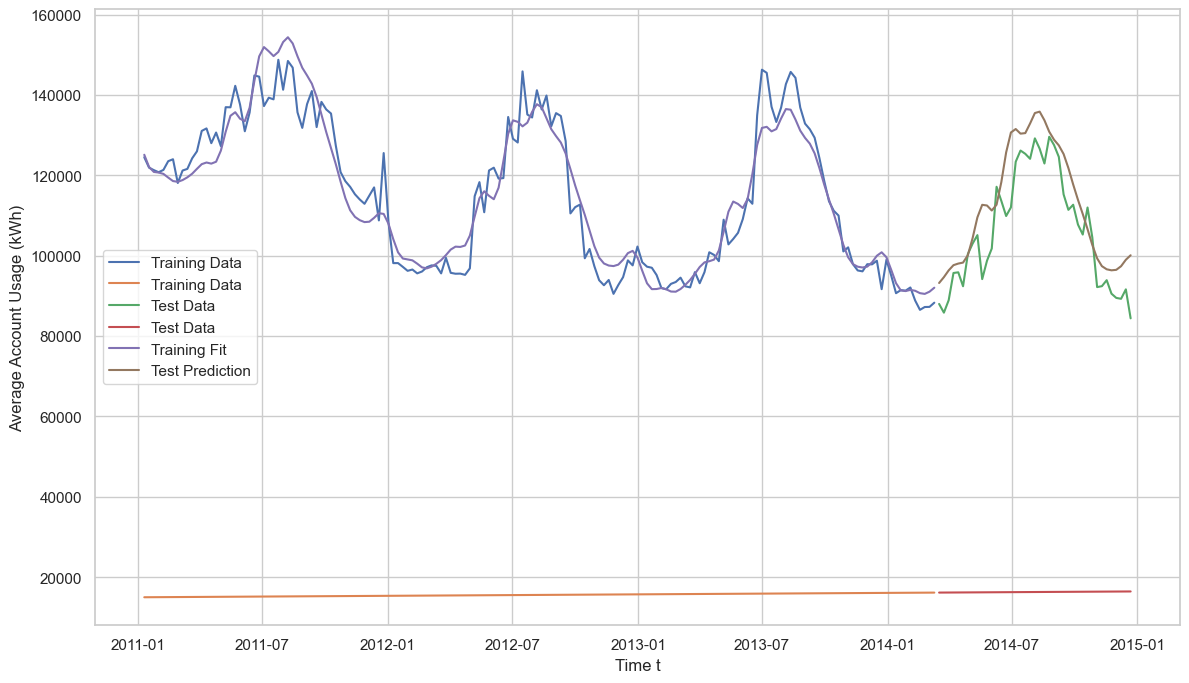

In [46]:
plt.plot(train, label = 'Training Data')
plt.plot(test, label = 'Test Data')
plt.plot(fit, label = 'Training Fit')
plt.plot(prediction, label = 'Test Prediction')
plt.xlabel('Time t')
plt.ylabel('Average Account Usage (kWh)')
plt.legend()
print("MAPE = {:0.2%}".format(MAPE(test.y.values, prediction.values)))

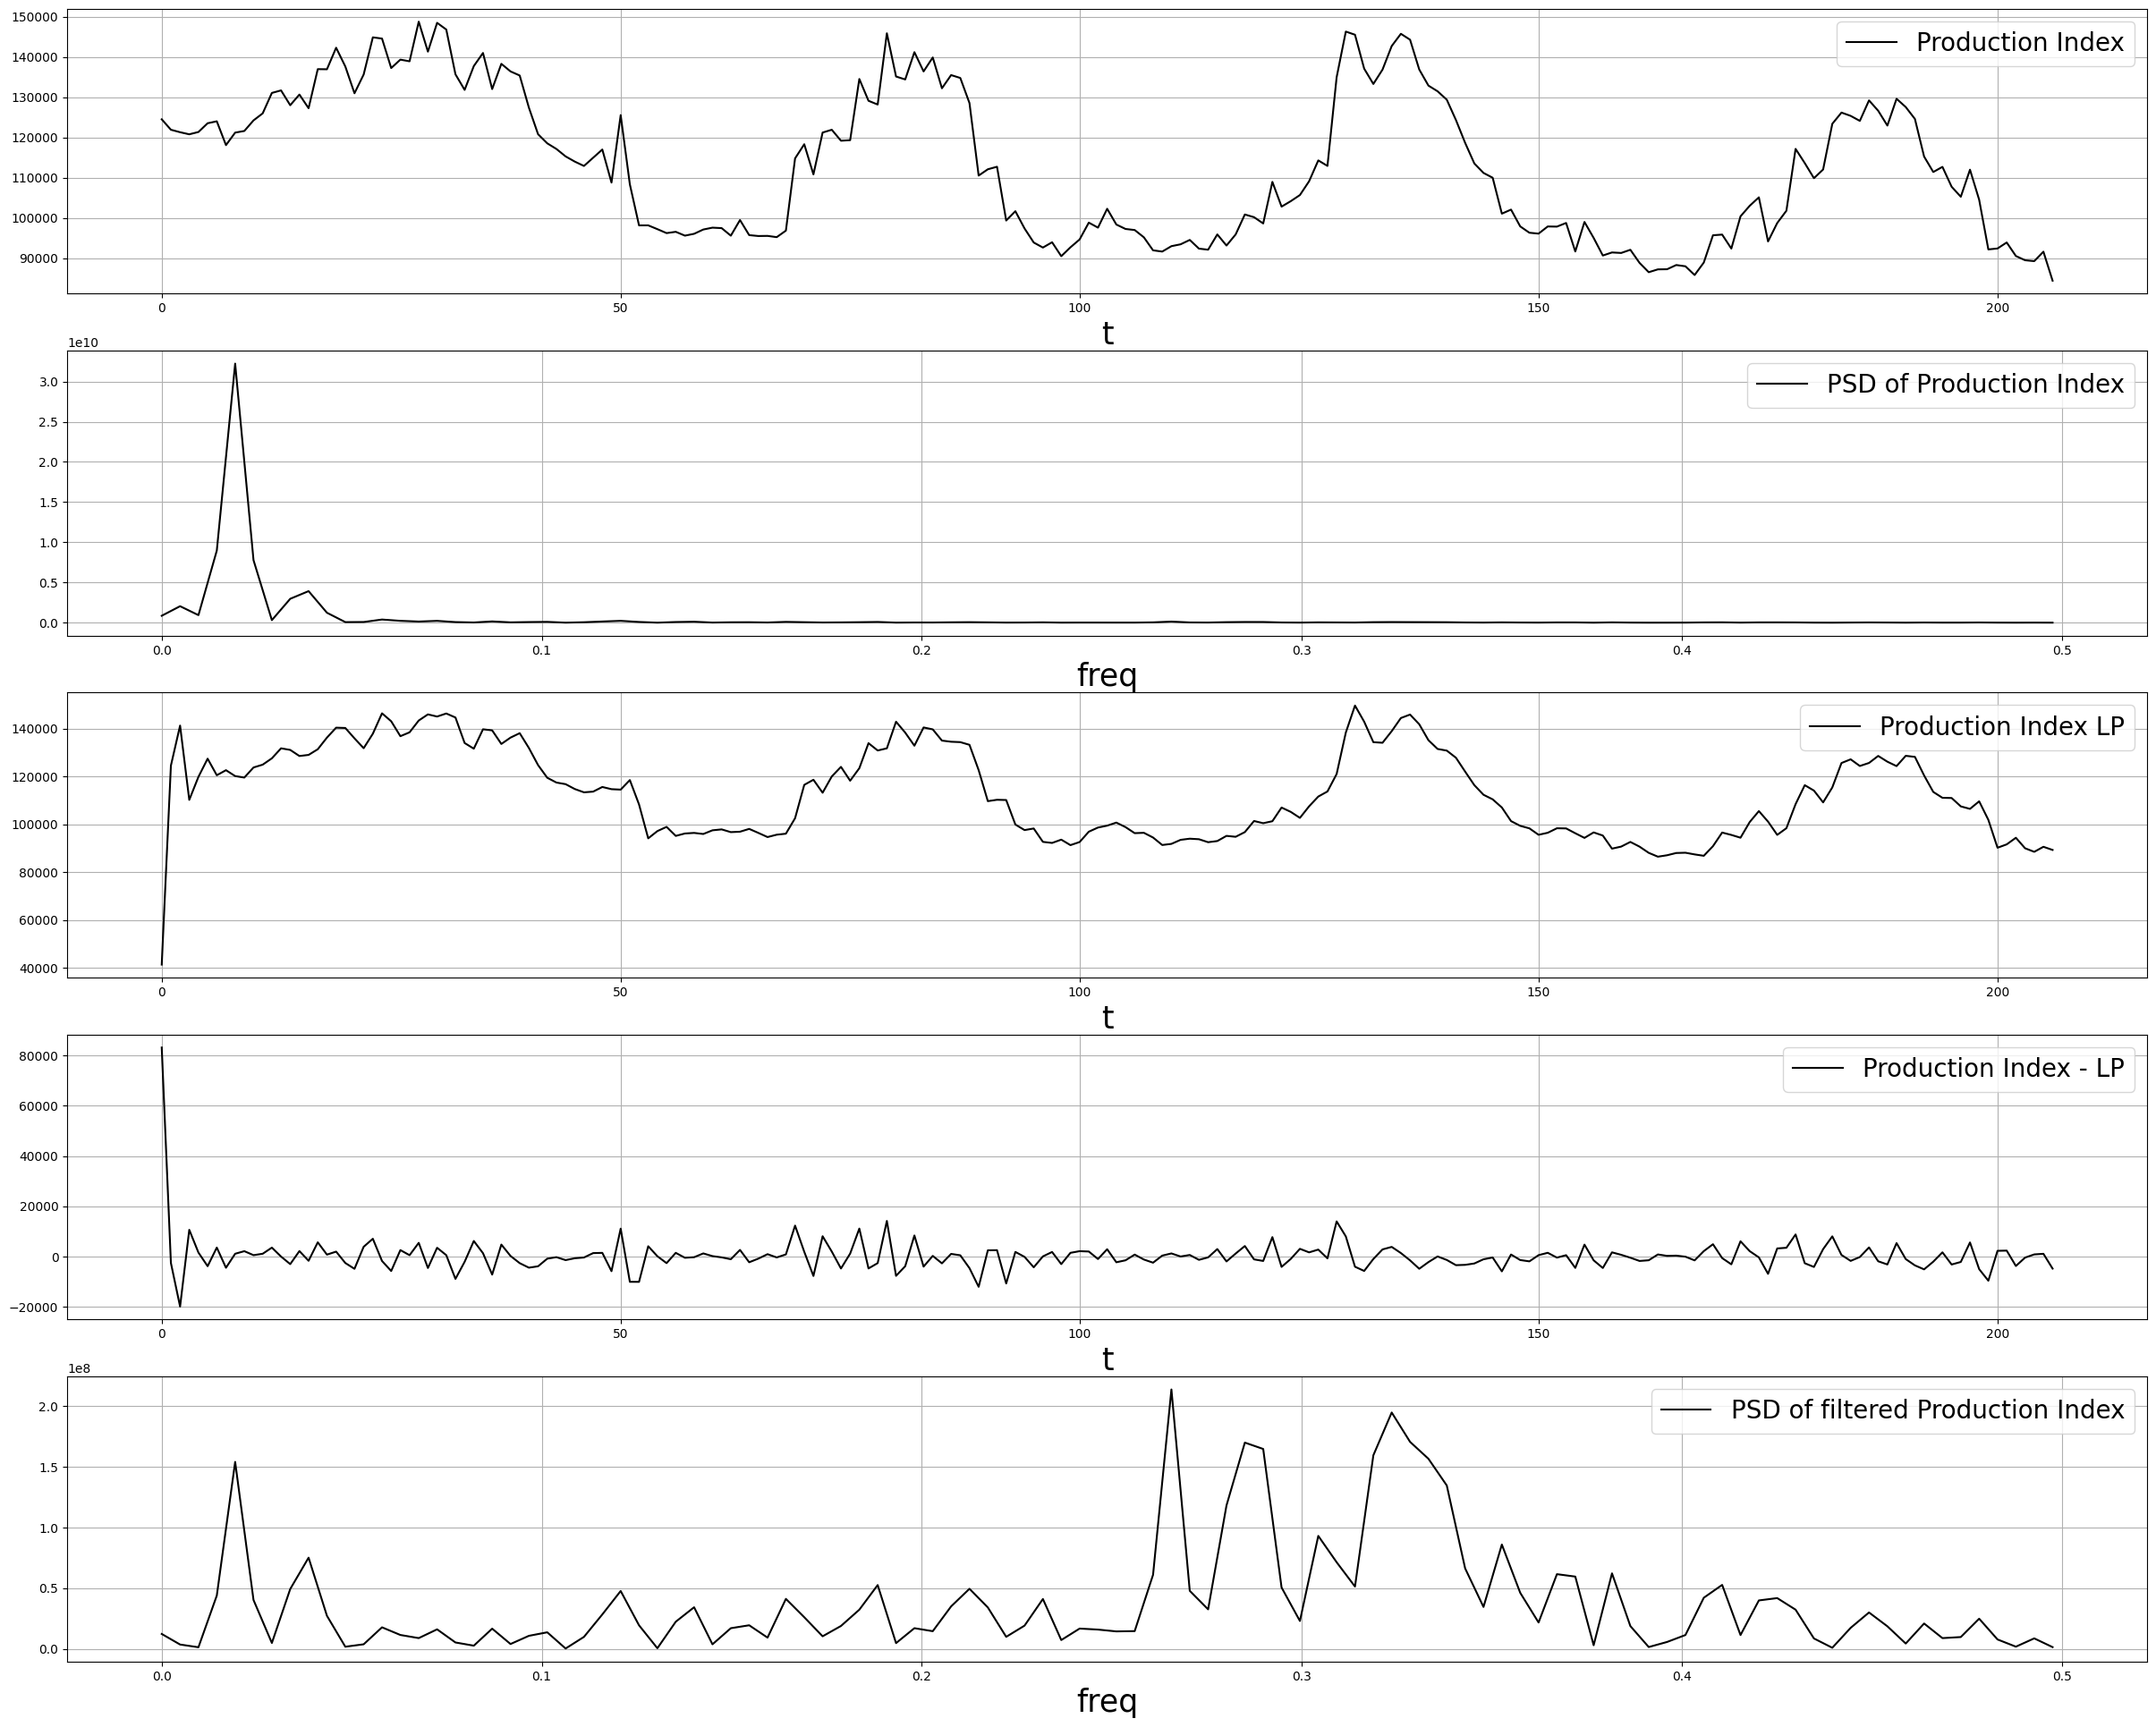

In [ ]:
# Low Pass Filter for overall
t = weekly_overall.t
sig = weekly_overall.value.values
RMSE = 1e9
fss=0
order=0

for i in np.arange(3,20):
    for j in np.arange(i,60):
        sos = signal.butter(i, 1, 'lowpass', fs=j, output='sos')
        filtered = signal.sosfilt(sos, sig)
        MSE = np.square(sig-filtered).mean() 
        if(RMSE > math.sqrt(MSE)):
            RMSE = math.sqrt(MSE)
            order = i
            fss = j
            
sos = signal.butter(order, 1, 'lowpass', fs=fss, output='sos')
filtered = signal.sosfilt(sos, sig)
fig = plt.figure(figsize=(30, 24))
ax1 = plt.subplot(511)
plt.plot(t, sig,'k')
plt.xlabel('t',fontsize=25)
plt.legend(['Production Index'],fontsize=20)
freqs, psd = signal.welch(sig)
plt.grid(True)
ax2 = plt.subplot(512)
plt.plot(freqs, psd,'k')
plt.xlabel('freq',fontsize=25)
plt.legend(['PSD of Production Index'],fontsize=20)
plt.grid(True)
ax3 = plt.subplot(513)
plt.plot(t, filtered,'k')
plt.xlabel('t',fontsize=25)
plt.legend(['Production Index LP'],fontsize=20)
plt.grid(True)
ax4 = plt.subplot(514)
plt.plot(t,sig-filtered,'k')
plt.xlabel('t',fontsize=25)
plt.legend(['Production Index - LP'],fontsize=20)
freqs, psd = signal.welch(sig-filtered)
plt.grid(True)
ax5 = plt.subplot(515)
plt.plot(freqs, psd,'k')
plt.xlabel('freq',fontsize=25)
plt.legend(['PSD of filtered Production Index'],fontsize=20)
plt.grid(True)
# plt.savefig('ProductionIndex_Butterworth.png')
plt.show()
MSE = np.square(sig-filtered).mean()
RMSE = math.sqrt(MSE)